In this File we will understand about Ridge Regularization(also known as L2 Regulariztion)

Let's First work in 2D


In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
class Ridge2D:
    def __init__(self,alpha=20):
        self.m=0
        self.b=0
        self.alpha=alpha
    def fit(self,X_train,y_train):
        xbar=X_train.mean()
        ybar=y_train.mean()
        sum1=0
        sum2=0
        for xi,yi in zip(X_train,y_train):
            sum1+=(xi-xbar)*(yi-ybar)
            sum2+=(xi-xbar)**2
        self.m=sum1/(sum2+self.alpha)
        self.b=ybar-self.m*xbar
    def predict(self,X_test):
        return self.m*X_test+self.b

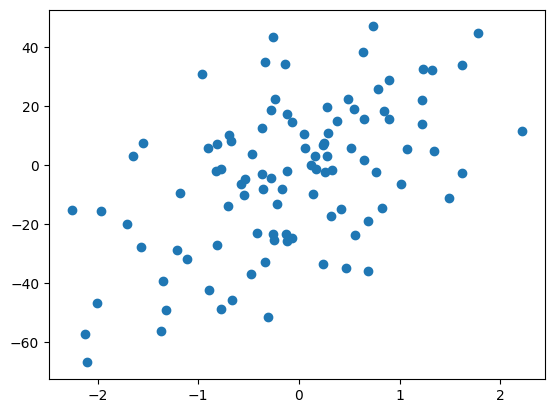

In [73]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
X,y=make_regression(n_features=1,n_informative=1,n_targets=1,noise=20)
plt.scatter(X,y)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
rd=Ridge2D(alpha=20)
rd.fit(X_train,y_train)

In [75]:
print(rd.m,rd.b)

[9.61337498] [-2.28058899]


In [76]:
rdx=Ridge(alpha=20)
rdx.fit(X_train,y_train)
print(rdx.coef_,rdx.intercept_)

[9.61337498] -2.2805889942121755


As we can see coefficients are same at same hyperparameter so we implemented Ridge Regression

Now Let's Prossed towards ND

In [77]:
class RidgeNd:
    def __init__ (self,alpha=0.01):
        self.coef_=np.array([])
        self.alpha=alpha
    def fit(self,X_train,y_train):
        X_t=np.hstack([np.ones((X_train.shape[0],1)),X_train])
        I=np.identity(X_t.shape[1])
        I[0][0]=0
        self.coef_=np.linalg.inv(np.dot(X_t.T,X_t)+self.alpha*I).dot(X_t.T).dot(y_train)
    def predict(self,X_test):
        X_t=np.hstack([np.ones((X_test.shape[0],1)),X_test])
        return np.dot(X_t,self.coef_)

In [78]:
X,y=make_regression(n_features=5,n_informative=5,n_targets=1,noise=20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
rd=RidgeNd(alpha=20)
rd.fit(X_train,y_train)
print(rd.coef_)


[-8.6301418  79.68614753  8.21084004 59.35889232 54.90312394 60.85897116]


In [79]:
rdx=Ridge(alpha=20)
rdx.fit(X_train,y_train)
print(rdx.coef_,rdx.intercept_)

[79.68614753  8.21084004 59.35889232 54.90312394 60.85897116] -8.63014180461371


Hence we can see that as coefficients are matched we have attained same thing by our class as scikit learn class